## Coursera Capstone Project — The Battle of Neighborhoods
## Relocation Conundrum
### By Ravindra Sariya
-----------------------------------------------------------------------------------

#### **Introduction**

In this world of globalization people often moves from one location to another due to various reasons. According to the 2016 Yearbook of Immigration Statistics, the United States admitted a total of 1.18 million legal immigrants (618k new arrivals, 565k status adjustments) in 2016. If we combine this number with internal migration in the country, then number would be even higher. When people move to a new location, they spend considerable amount of time in finding the place to live in the new city. They take help of their friends, relatives, colleagues etc. if they are already living in the destination city.  But many of them still get disappointed and wants to change the rented home or apartment within a few months of relocation. It affects person on many other aspects such as school of their kids, their membership on gym and yoga centers. So, they spend time and money to know the neighborhood, which they would like once they relocate. Even, people take help of external agents to help them to find the good neighborhoods.

#### **Problem Statement**

There is an ABC global relocation consultant firm, who advises people for their relocation needs in worlds major metropolitan cities. They charge 50% of their fees to clients at the time of recommending the place before moving to the location and next 50% after 3 months of relocation. Using past data, they found that only in 60% of cases they get remaining fees after three months of the relocation. They also noticed that if they recommend the place similar to the place where customer currently staying then probability of getting due fees increased to 95%.

Few days back, they got a client who is moving to New York from Toronto. He is currently staying at The Beaches West neighborhood in Toronto. He suggested that he likes The Beaches West and India Bazar neighborhoods of Toronto compared to other Neighborhoods. He also requested to recommend the neighborhoods in the borough which has low crime rates. Basically, his idea was to get a small list of neighborhoods which he can explore by himself and take a decision based on other factors such as cost, distance from his employer etc.

#### **Data Requirements**

For this project we need the following data:
* New York City data that contains the list of Boroughs, Neighborhoods along with their latitude and longitude.
     * Data source: https://cocl.us/new_york_dataset
* New York City crime data that contains list of all the reported crimes in year 2018 as per Boroughs
    * Data source: Downloaded the csv file from following location: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i
* 2020 Projected population of different boroughs
    * Data source: Downloaded the csv file from following location: 
https://data.cityofnewyork.us/City-Government/2020-population/t8c6-3i7b
* Toronto City data that contains the list Boroughs, Neighborhoods 
    * Data source: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
* Geospatial data for Toronto to get latitude and longitude of all Boroughs and Neighborhoods
    *Data source: https://cocl.us/Geospatial_data
* Data source: Fousquare API
    * Description: By using Foursquare api we will can explore all the venues in each neighborhood. 

#### Importing required libraries

In [135]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # libary for webScrapping
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors


# libraries for displaying images
from IPython.display import Image , display_html
from IPython.core.display import HTML

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Web scrapping of Toronto Neigborhood data 

In [116]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"  # url of the web page
response=requests.get(url)  # request the web page
soup=BeautifulSoup(response.text,"lxml") # webscrapping of wikipedia page

# print the title of the web page
print(soup.title.text)

# display the table content of wikipedia page
display_html(str(soup.table),raw=True)

List of postal codes of Canada: M - Wikipedia


Postal Code,Borough,Neighborhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [117]:
# Converting the Data into Dataframe
data=pd.read_html(str(soup.table)) # convert the html table to dataframe
data=data[0] # data is list object, so take first element of the list
data.head()  # few observations

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


Importing coordinates for the Neighborhoods of Toronto

In [118]:
# Data Processing

data=data[data.Borough != "Not assigned"] # Drop the rows where Borough is "Not assigned"


#data[data['Neighborhood']=='Not assigned']=data['Borough']


# Combine the neighborhood with same postal code
data1=data.groupby(["Postal Code","Borough"],sort=False)["Neighborhood"].apply(lambda x : ', '.join(x)).reset_index()
data1.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [119]:
# Read the coordinates file
coordinates=pd.read_csv("https://cocl.us/Geospatial_data")
coordinates.head() # first few observations

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merge the both the data sets (Toronto Neighborhoods data with geospatial data)

In [120]:
# Merge the both the data sets 

df=pd.merge(data1,coordinates,on="Postal Code")
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Extracting data for The Beaches West & India Bazaar Neighborhoods

In [121]:
The_Beaches_West=df.loc[df.Neighborhood.str.contains("The Beaches West"),:]

In [122]:
The_Beaches_West

,Postal Code,Borough,Neighborhood,Latitude,Longitude
47,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572


**Map** of The Beaches West & India Bazaar Neighborhood

In [10]:
# Create map for Lawrence Neighborhood
latitude=The_Beaches_West.Latitude.values[0]
longitude=The_Beaches_West.Longitude.values[0]
label="The_Beaches_West"
map_The_Beaches_West = folium.Map(location=[latitude, longitude], zoom_start=10)

folium.CircleMarker(
        [latitude,longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_The_Beaches_West) 
map_The_Beaches_West

#### Explore venues around The Beaches West & India Bazaar Neighborhood

Credential and version

In [123]:
CLIENT_ID = '5HD1C2EQCR03102EN0TXEGHX4WHWMIMHSNZG5OD4UV2NIWLR' # your Foursquare ID
CLIENT_SECRET = 'ZIXTEG4E0Z3IFLBFMRHXIAZZARK5U53S3VUQBOROTKZKFF4Z' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5HD1C2EQCR03102EN0TXEGHX4WHWMIMHSNZG5OD4UV2NIWLR
CLIENT_SECRET:ZIXTEG4E0Z3IFLBFMRHXIAZZARK5U53S3VUQBOROTKZKFF4Z


Explore venues within 500 Meter radius

In [124]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [125]:
# To get all the venues in Neighborhood of Toronto

The_Beaches_West_venues = getNearbyVenues(names=The_Beaches_West['Neighborhood'],
                                   latitudes=The_Beaches_West['Latitude'],
                                   longitudes=The_Beaches_West['Longitude']
                                  )

India Bazaar, The Beaches West


In [126]:
The_Beaches_West_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"India Bazaar, The Beaches West",43.668999,-79.315572,System Fitness,43.667171,-79.312733,Gym
1,"India Bazaar, The Beaches West",43.668999,-79.315572,British Style Fish & Chips,43.668723,-79.317139,Fish & Chips Shop
2,"India Bazaar, The Beaches West",43.668999,-79.315572,Brett's Ice Cream,43.667222,-79.312831,Ice Cream Shop
3,"India Bazaar, The Beaches West",43.668999,-79.315572,The Burger's Priest,43.666731,-79.315556,Fast Food Restaurant
4,"India Bazaar, The Beaches West",43.668999,-79.315572,O Sushi,43.666684,-79.316614,Sushi Restaurant
5,"India Bazaar, The Beaches West",43.668999,-79.315572,Godspeed Brewery,43.672620,-79.319228,Brewery
6,"India Bazaar, The Beaches West",43.668999,-79.315572,Woodbine Park,43.664860,-79.315109,Park
7,"India Bazaar, The Beaches West",43.668999,-79.315572,LCBO,43.666732,-79.314966,Liquor Store
8,"India Bazaar, The Beaches West",43.668999,-79.315572,Casa di Giorgio,43.666645,-79.315204,Italian Restaurant
9,"India Bazaar, The Beaches West",43.668999,-79.315572,Pet Valu,43.666979,-79.314665,Pet Store


Map of the venues in The Beaches West, India Bazaar Neighborhood

In [19]:
latitude=43.668999 #India Bazar, The Beaches West Latitude
longitude=-79.315572  #India Bazar, The Beaches West Longitude

map_The_Beaches_West = folium.Map(location=[latitude, longitude], zoom_start=11)


folium.CircleMarker(
        [latitude,longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_The_Beaches_West) 

for lat, lon, venue in zip(The_Beaches_West_venues["Venue Latitude"], The_Beaches_West_venues['Venue Longitude'],The_Beaches_West_venues["Venue"]):
    label = venue
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7).add_to(map_The_Beaches_West)
       
map_The_Beaches_West

#### Importing crime data of New York

In [128]:
crime_data=pd.read_csv("NYPD_Complaint_Data_Historic.csv")
crime_data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,522575447,08/29/2006,13:00:00,NaN,NaN,43.0,08/30/2006,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1018029.0,240747.0,NaN,UNKNOWN,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F
1,403507361,11/05/2006,11:00:00,11/05/2006,17:40:00,66.0,11/05/2006,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,982556.0,171385.0,NaN,NaN,NaN,NaN,40.637097,-74.006105,"(40.637096864, -74.006105014)",PATROL BORO BKLYN SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
2,631420068,09/08/2006,23:30:00,09/09/2006,00:01:00,106.0,09/09/2006,347,INTOXICATED & IMPAIRED DRIVING,905.0,"INTOXICATED DRIVING,ALCOHOL",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1028213.0,186786.0,NaN,NaN,NaN,NaN,40.679260,-73.841500,"(40.679260229, -73.841500185)",PATROL BORO QUEENS SOUTH,NaN,NaN,UNKNOWN,E
3,995609899,12/13/2011,18:40:00,12/13/2011,18:49:00,79.0,12/13/2011,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,CHAIN STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000788.0,189718.0,NaN,NaN,NaN,NaN,40.687402,-73.940369,"(40.687401619, -73.940369194)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,480667624,08/14/2009,04:20:00,NaN,NaN,30.0,08/14/2009,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000029.0,242245.0,NaN,NaN,NaN,NaN,40.831576,-73.942983,"(40.831576128, -73.942982699)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E


In [129]:
crime_data.shape

(7309655, 35)

In [130]:
crime_data["BORO_NM"].value_counts()

BROOKLYN         2167449
MANHATTAN        1761367
BRONX            1585367
QUEENS           1443975
STATEN ISLAND     340413
Name: BORO_NM, dtype: int64

In [132]:
crime=crime_data.groupby(["BORO_NM","LAW_CAT_CD","OFNS_DESC"])["PD_DESC"].size().reset_index()
crime.head()

,BORO_NM,LAW_CAT_CD,OFNS_DESC,PD_DESC
0,BRONX,FELONY,ABORTION,1
1,BRONX,FELONY,ARSON,4816
2,BRONX,FELONY,BURGLARY,44181
3,BRONX,FELONY,CHILD ABANDONMENT/NON SUPPORT,148
4,BRONX,FELONY,CRIMINAL MISCHIEF & RELATED OF,17282


In [133]:
# Different types of Crime and their counts

crime_type=crime_data.groupby(["BORO_NM","LAW_CAT_CD"])["PD_DESC"].count().reset_index()
crime_type.head()

,BORO_NM,LAW_CAT_CD,PD_DESC
0,BRONX,FELONY,428092
1,BRONX,MISDEMEANOR,949503
2,BRONX,VIOLATION,207772
3,BROOKLYN,FELONY,703434
4,BROOKLYN,MISDEMEANOR,1181171


#### Visualize Number of Crime per Borough

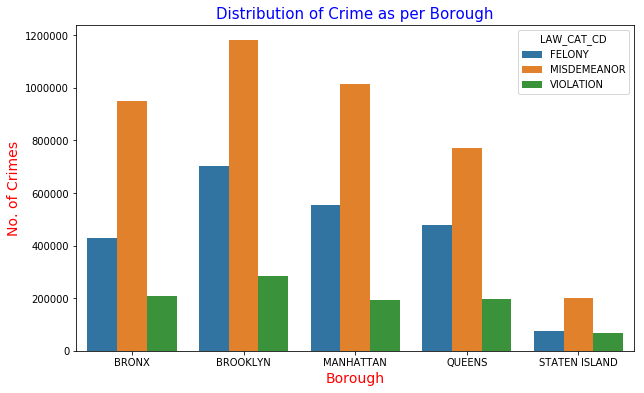

In [136]:
plt.figure(figsize=(10,6))
sns.barplot(x="BORO_NM",y="PD_DESC",hue="LAW_CAT_CD",data=crime_type)
plt.title("Distribution of Crime as per Borough",color="blue",size=15)
plt.xlabel("Borough",size=14,color="red")
plt.ylabel("No. of Crimes",size=14,color="red");

Extracting the crime data for crime type Felony as it is the worst category of crime among three given categories

In [137]:
# fetch felony data
felony=crime[crime["LAW_CAT_CD"]=="FELONY"]
felony.groupby("OFNS_DESC")["PD_DESC"].sum()

OFNS_DESC
ABORTION                                7
ARSON                               17316
BURGLARY                           246395
CHILD ABANDONMENT/NON SUPPORT         450
CRIMINAL MISCHIEF & RELATED OF     122513
DANGEROUS DRUGS                     84491
DANGEROUS WEAPONS                   72593
ENDAN WELFARE INCOMP                   94
FELONY ASSAULT                     280938
FELONY SEX CRIMES                      14
FORGERY                             74369
GAMBLING                              138
GRAND LARCENY                      634653
GRAND LARCENY OF MOTOR VEHICLE     128648
HOMICIDE-NEGLIGENT,UNCLASSIFIE        164
HOMICIDE-NEGLIGENT-VEHICLE            106
INTOXICATED/IMPAIRED DRIVING           64
KIDNAPPING                             54
KIDNAPPING & RELATED OFFENSES        2875
KIDNAPPING AND RELATED OFFENSES         4
MISCELLANEOUS PENAL LAW            172497
NYS LAWS-UNCLASSIFIED FELONY         6988
OTHER STATE LAWS (NON PENAL LA        183
POSSESSION OF STOLEN PRO

In [138]:
boro_felony=felony.groupby("BORO_NM")["PD_DESC"].sum().reset_index()
boro_felony.rename(columns={"BORO_NM":"Borough"},inplace=True)
boro_felony

,Borough,PD_DESC
0,BRONX,427916
1,BROOKLYN,703224
2,MANHATTAN,555234
3,QUEENS,476811
4,STATEN ISLAND,74859


#### Visualize Felony Crime Per Borough

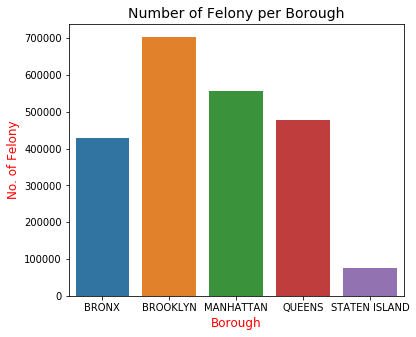

In [139]:
fig,ax=plt.subplots(figsize=(6,5))
sns.barplot(x="Borough",y="PD_DESC",data=boro_felony)
plt.title("Number of Felony per Borough",size=14)
plt.ylabel("No. of Felony",size=12,color="red")
plt.xlabel("Borough",size=12,color="red");

Importing Borough Population Data for New York

In [140]:
# Load population data of New York
population=pd.read_csv("datasets_1909_3300_Population_by_Borough_NYC.csv")
population.head() # observation

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,1990,1990 - Boro share of NYC total,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,"7,891,957",100%,"7,781,984",100%,"7,894,862",100%,"7,071,639",100%,"7,322,564",100%,"8,008,278",100%,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%,"9,025,145",100%
1,Total Population,Bronx,"1,451,277",18.39%,"1,424,815",18.31%,"1,471,701",18.64%,"1,168,972",16.53%,"1,203,789",16.44%,"1,332,650",16.64%,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%,"1,579,245",17.5%
2,Total Population,Brooklyn,"2,738,175",34.7%,"2,627,319",33.76%,"2,602,012",32.96%,"2,230,936",31.55%,"2,300,664",31.42%,"2,465,326",30.78%,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%,"2,840,525",31.47%
3,Total Population,Manhattan,"1,960,101",24.84%,"1,698,281",21.82%,"1,539,233",19.5%,"1,428,285",20.2%,"1,487,536",20.31%,"1,537,195",19.2%,"1,585,873",19.24%,"1,638,281",19.16%,"1,676,720",19.01%,"1,691,617",18.74%
4,Total Population,Queens,"1,550,849",19.65%,"1,809,578",23.25%,"1,986,473",25.16%,"1,891,325",26.75%,"1,951,598",26.65%,"2,229,379",27.84%,"2,250,002",27.3%,"2,330,295",27.25%,"2,373,551",26.91%,"2,412,649",26.73%


In [141]:
# Extract population for 2020
population_data=population[["Borough","2020"]]
population_data

,Borough,2020
0,NYC Total,"8,550,971"
1,Bronx,"1,446,788"
2,Brooklyn,"2,648,452"
3,Manhattan,"1,638,281"
4,Queens,"2,330,295"
5,Staten Island,"487,155"


In [142]:
# preprocessing the data
population_data.Borough=population_data.Borough.str.upper()
population_data=population_data.iloc[1:,:]
population_data.reset_index(drop=True,inplace=True)
population_data

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Borough,2020
0,BRONX,"1,446,788"
1,BROOKLYN,"2,648,452"
2,MANHATTAN,"1,638,281"
3,QUEENS,"2,330,295"
4,STATEN ISLAND,"487,155"


Merged Data for Population and Crime type Felony

In [143]:
final_data=pd.concat([boro_felony,population_data],axis=1,ignore_index=True)
final_data.drop(2,axis=1,inplace=True)
final_data.rename(columns={0:"Borough",1:"Felony_Crime",3:"Population"},inplace=True)
final_data

,Borough,Felony_Crime,Population
0,BRONX,427916,"1,446,788"
1,BROOKLYN,703224,"2,648,452"
2,MANHATTAN,555234,"1,638,281"
3,QUEENS,476811,"2,330,295"
4,STATEN ISLAND,74859,"487,155"


In [144]:
# Crime Proportion based on Population
final_data["Population"]=final_data["Population"].str.replace(",","")
final_data["Population"]=final_data["Population"].astype(int)
final_data["Felony_Crime/Population"]=final_data.Felony_Crime/final_data.Population
final_data.head()

,Borough,Felony_Crime,Population,Felony_Crime/Population
0,BRONX,427916,1446788,0.295770
1,BROOKLYN,703224,2648452,0.265523
2,MANHATTAN,555234,1638281,0.338913
3,QUEENS,476811,2330295,0.204614
4,STATEN ISLAND,74859,487155,0.153666


Staten Island has the lowest ratio of crime per unit population. But, client has reservation to go to Staten Island. Queen has second lowest crime rates. Therefore, we will look for our target Neighborhood in Queens Borough.

#### Explore venues around all the neighborhood in Queens

#### New York Neighborhood Data

In [145]:
# Request data
import urllib.request
url="https://cocl.us/new_york_dataset"
filename='newyork_data.json'
urllib.request.urlretrieve(url,filename)
print('Data downloaded!')

Data downloaded!


In [146]:
# load data in json format
with open('newyork_data.json') as json_data:
    newyork_data=json.load(json_data)


Transform the data into pandas dataframe

In [147]:
# Extract features of the newyork data
neighborhood_data = newyork_data['features']

# define the dataframe columns
column=["Borough","Neighborhood","Latitude","Longitude"]

# create an empty dataframe
neighborhood=pd.DataFrame(columns=column)

In [148]:
neighborhood

,Borough,Neighborhood,Latitude,Longitude


In [149]:
for data in neighborhood_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhood = neighborhood.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [150]:
neighborhood.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [151]:
print("Data has {} Borough and {} Neighborhood ".format(neighborhood.Borough.nunique(),neighborhood.shape[0]))

Data has 5 Borough and 306 Neighborhood 


#### Explore Queens

In [152]:
# fetch queens data 
queens_data=neighborhood[neighborhood["Borough"]=="Queens"].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [153]:
# latitude and longitude of "Queens"
address = 'Queens, NY'
geolocator=Nominatim(user_agent="ny_explorer")
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print("Geographical Coordinates of Queens are {} {} ".format(latitude,longitude))

Geographical Coordinates of Queens are 40.7498243 -73.7976337 


In [55]:

map_queens_neigh = folium.Map(location=[latitude, longitude], zoom_start=11)

label="Queens"
folium.CircleMarker(
        [latitude,longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens_neigh) 

for lat, lon, neighborhood in zip(queens_data["Latitude"], queens_data['Longitude'],queens_data["Neighborhood"]):
    label = neighborhood
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7).add_to(map_queens_neigh)
       
map_queens_neigh

#### Explore Neighborhoods in queens

In [154]:
# Define Credential and version
CLIENT_ID = '5HD1C2EQCR03102EN0TXEGHX4WHWMIMHSNZG5OD4UV2NIWLR' # your Foursquare ID
CLIENT_SECRET = 'ZIXTEG4E0Z3IFLBFMRHXIAZZARK5U53S3VUQBOROTKZKFF4Z' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5HD1C2EQCR03102EN0TXEGHX4WHWMIMHSNZG5OD4UV2NIWLR
CLIENT_SECRET:ZIXTEG4E0Z3IFLBFMRHXIAZZARK5U53S3VUQBOROTKZKFF4Z


In [157]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [158]:
queens_venue=getNearbyVenues(queens_data.Neighborhood,queens_data.Latitude,queens_data.Longitude)

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [159]:
# Venue name and categories
print(queens_venue.shape)
queens_venue.head()

(1545, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


In [160]:
# Count of distinct venue category
queens_venue.groupby("Venue Category")["Venue"].count().reset_index().head(20)

,Venue Category,Venue
0,Accessories Store,2
1,Afghan Restaurant,2
2,American Restaurant,16
3,Antique Shop,1
4,Arepa Restaurant,3
5,Argentinian Restaurant,2
6,Arts & Crafts Store,2
7,Asian Restaurant,9
8,Athletics & Sports,2
9,Automotive Shop,2


In [161]:
# One hot encoding
queens_onehot = pd.get_dummies(queens_venue[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
queens_onehot['Neighborhood'] = queens_venue['Neighborhood'] 

# move neighborhood column to the first column
queens_onehot.drop(['Neighborhood'],axis=1,inplace=True)
queens_onehot.insert(loc=0,column="Neighborhood",value=queens_venue["Neighborhood"])
queens_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Beer Garden,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,

In [66]:
queens_grouped=queens_onehot.groupby("Neighborhood").mean().reset_index()
queens_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Beer Garden,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Arverne,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0

In [68]:
# Function to sort the venue in descending order to get top 10 venues in a given neighborhood
def return_most_common_venues(row, num_top_venues):   
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [70]:
# Top 10 venues in each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = queens_grouped['Neighborhood']

for ind in np.arange(queens_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Sandwich Place,Metro Station,Coffee Shop,Thai Restaurant,Board Shop,Donut Shop,Beach,Pizza Place,Bus Stop
1,Astoria,Seafood Restaurant,Gourmet Shop,Dessert Shop,Ice Cream Shop,Middle Eastern Restaurant,Gym,Indian Restaurant,Pizza Place,Pub,Restaurant
2,Astoria Heights,Burger Joint,Bakery,Playground,Plaza,Chinese Restaurant,Motel,Bus Station,Pizza Place,Supermarket,Bowling Alley
3,Auburndale,Fast Food Restaurant,Discount Store,Noodle House,Toy / Game Store,Korean Restaurant,Italian Restaurant,Train,Furniture / Home Store,Supermarket,Athletics & Sports
4,Bay Terrace,Clothing Store,Cosmetics Shop,American Restaurant,Kids Store,Lingerie Store,Mobile Phone Shop,Donut Shop,Deli / Bodega,Coffee Shop,Pizza Place


Our goal is to find the list of neighborhoods in Queens which are similar with clients current location in Toronto. 
Therefore, we will merge the neighborhood details for The Beaches West and India Bazaar in the Queens neighborhoods details. 
Then we will perform K-means clustering to get similar neighborhoods in Queens. 

#### Merge data of venue in Queens neighborhoods with The Beaches West and India Bazaar

In [72]:
queens_Beaches_west_combine=pd.concat([queens_venue,The_Beaches_West_venues],axis=0)

In [73]:
### One hot Encoding of complete merged file

# one hot encoding
combined_onehot = pd.get_dummies(queens_Beaches_west_combine[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
combined_onehot['Neighborhood'] = queens_Beaches_west_combine['Neighborhood'] 

# move neighborhood column to the first column
combined_onehot.drop(['Neighborhood'],axis=1,inplace=True)
combined_onehot.insert(loc=0,column="Neighborhood",value=queens_Beaches_west_combine["Neighborhood"])
combined_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Beer Garden,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [74]:
combined_grouped=combined_onehot.groupby("Neighborhood").mean().reset_index()

In [75]:
combined_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Beer Garden,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Arverne,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0000

In [77]:
# Top 10 venue for all the neighborhoods in merged dataset
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [78]:
# Top 10 venue category
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = combined_grouped['Neighborhood']

for ind in np.arange(combined_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(combined_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Metro Station,Sandwich Place,Donut Shop,Bus Stop,Board Shop,Beach,Thai Restaurant,Coffee Shop,Pizza Place
1,Astoria,Seafood Restaurant,Gourmet Shop,Dessert Shop,Ice Cream Shop,Middle Eastern Restaurant,Gym,Indian Restaurant,Pizza Place,Pub,Restaurant
2,Astoria Heights,Burger Joint,Bakery,Playground,Plaza,Chinese Restaurant,Motel,Bus Station,Pizza Place,Supermarket,Bowling Alley
3,Auburndale,Hookah Bar,Discount Store,Korean Restaurant,Noodle House,Supermarket,Toy / Game Store,Italian Restaurant,Train,Fast Food Restaurant,Furniture / Home Store
4,Bay Terrace,Clothing Store,Cosmetics Shop,Kids Store,Donut Shop,Mobile Phone Shop,Lingerie Store,American Restaurant,Gift Shop,Furniture / Home Store,Supermarket


#### K-Means Clustering

Clustering is divided in two parts. One to remove outliers and second to group the similar Neighborhood from a homogeneous dataset.

In [80]:
# set number of clusters
kclusters = 10

combined_grouped_clustering = combined_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(combined_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([7, 7, 4, 0, 0, 7, 9, 4, 7, 7], dtype=int32)

In [81]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [82]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,7,Arverne,Surf Spot,Metro Station,Sandwich Place,Donut Shop,Bus Stop,Board Shop,Beach,Thai Restaurant,Coffee Shop,Pizza Place
1,7,Astoria,Seafood Restaurant,Gourmet Shop,Dessert Shop,Ice Cream Shop,Middle Eastern Restaurant,Gym,Indian Restaurant,Pizza Place,Pub,Restaurant
2,4,Astoria Heights,Burger Joint,Bakery,Playground,Plaza,Chinese Restaurant,Motel,Bus Station,Pizza Place,Supermarket,Bowling Alley
3,0,Auburndale,Hookah Bar,Discount Store,Korean Restaurant,Noodle House,Supermarket,Toy / Game Store,Italian Restaurant,Train,Fast Food Restaurant,Furniture / Home Store
4,0,Bay Terrace,Clothing Store,Cosmetics Shop,Kids Store,Donut Shop,Mobile Phone Shop,Lingerie Store,American Restaurant,Gift Shop,Furniture / Home Store,Supermarket


In [83]:
neighborhoods_venues_sorted.shape

(82, 12)

#### Examine the clusters

In [85]:
first_cluster=neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 0,:]

In [86]:
first_cluster.shape

(20, 12)

In [87]:
second_cluster=neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 1,:]

In [88]:
second_cluster.shape

(1, 12)

In [89]:
third_cluster=neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 2,:]

In [90]:
third_cluster.shape

(1, 12)

In [91]:
fourth_cluster=neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 3,:]

In [92]:
fourth_cluster.shape

(1, 12)

In [93]:
fifth_cluster=neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 4,:]

In [94]:
fifth_cluster.shape

(18, 12)

In [95]:
sixth_cluster=neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 5,:]

In [96]:
sixth_cluster.shape

(1, 12)

In [97]:
seventh_cluster=neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 6,:]

In [98]:
seventh_cluster.shape

(1, 12)

In [99]:
eighth_cluster=neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 7,:]

In [100]:
eighth_cluster.shape

(37, 12)

In [101]:
eighth_cluster[eighth_cluster["Neighborhood"]=="India Bazaar, The Beaches West"]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,7,"India Bazaar, The Beaches West",Sandwich Place,Fast Food Restaurant,Pizza Place,Park,Movie Theater,Steakhouse,Restaurant,Brewery,Food & Drink Shop,Liquor Store


Eighth cluster has total 37 neighborhoods. Above clustering has basically removed the extreme outliers. Now we will again perform K-means clustering on this 37 neighborhoods including The Beaches West and India Bazaar.

In [102]:
queens_eighth_cluster=eighth_cluster[eighth_cluster["Neighborhood"]!="India Bazaar, The Beaches West"]

In [103]:
# Merge queens_eights_cluster with queens data to get latitude and longitude for each Neighborhood
#queens_merged_cluster=queens_data.join(queens_eighth_cluster.set_index("Neighborhood"),on="Neighborhood")
queens_merged_cluster=pd.merge(queens_data, queens_eighth_cluster.set_index("Neighborhood"),on="Neighborhood")
queens_merged_cluster.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,7,Seafood Restaurant,Gourmet Shop,Dessert Shop,Ice Cream Shop,Middle Eastern Restaurant,Gym,Indian Restaurant,Pizza Place,Pub,Restaurant
1,Queens,Woodside,40.746349,-73.901842,7,Bakery,American Restaurant,Pub,Thai Restaurant,Grocery Store,Latin American Restaurant,Bar,Spa,Diner,Coffee Shop
2,Queens,Jackson Heights,40.751981,-73.882821,7,Peruvian Restaurant,Latin American Restaurant,Bakery,Diner,Thai Restaurant,Spanish Restaurant,South American Restaurant,Burger Joint,Empanada Restaurant,Gay Bar
3,Queens,Elmhurst,40.744049,-73.881656,7,Mexican Restaurant,Thai Restaurant,Chinese Restaurant,Vietnamese Restaurant,South American Restaurant,Colombian Restaurant,Pizza Place,Argentinian Restaurant,Food Court,Indonesian Restaurant
4,Queens,Corona,40.742382,-73.856825,7,Mexican Restaurant,Deli / Bodega,Bakery,Pizza Place,Supermarket,Empanada Restaurant,Sandwich Place,Basketball Court,Donut Shop,Restaurant


In [104]:
latitude=40.7498243  #Queens Latitude
longitude=-73.7976337  # Queens Longitude

map_queens_cluster = folium.Map(location=[latitude, longitude], zoom_start=11)


folium.CircleMarker(
        [latitude,longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens_cluster) 

for lat, lon, neighborhood in zip(queens_merged_cluster["Latitude"], queens_merged_cluster['Longitude'],queens_merged_cluster["Neighborhood"]):
    label = neighborhood
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7).add_to(map_queens_cluster)
       
map_queens_cluster

In [105]:
###################################################################

In [106]:
queens_merged_subset=pd.merge(queens_Beaches_west_combine, eighth_cluster.set_index("Neighborhood"),on="Neighborhood")
queens_merged_subset.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant,7,Seafood Restaurant,Gourmet Shop,Dessert Shop,Ice Cream Shop,Middle Eastern Restaurant,Gym,Indian Restaurant,Pizza Place,Pub,Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop,7,Seafood Restaurant,Gourmet Shop,Dessert Shop,Ice Cream Shop,Middle Eastern Restaurant,Gym,Indian Restaurant,Pizza Place,Pub,Restaurant
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop,7,Seafood Restaurant,Gourmet Shop,Dessert Shop,Ice Cream Shop,Middle Eastern Restaurant,Gym,Indian Restaurant,Pizza Place,Pub,Restaurant
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym,7,Seafood Restaurant,Gourmet Shop,Dessert Shop,Ice Cream Shop,Middle Eastern Restaurant,Gym,Indian Restaurant,Pizza Place,Pub,Restaurant
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant,7,Seafood Restaurant,Gourmet Shop,Dessert Shop,Ice Cream Shop,Middle Eastern Restaurant,Gym,Indian Restaurant,Pizza Place,Pub,Restaurant


In [107]:
queens_Beaches_merged_subset=queens_merged_subset.iloc[:,0:7]
queens_Beaches_merged_subset

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant
5,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym
6,Astoria,40.768509,-73.915654,Sitan Muay Thai,40.766108,-73.913224,Martial Arts Dojo
7,Astoria,40.768509,-73.915654,Al-sham Sweets and Pastries,40.768077,-73.911561,Middle Eastern Restaurant
8,Astoria,40.768509,-73.915654,SVL Bar,40.769816,-73.918530,Greek Restaurant
9,Astoria,40.768509,-73.915654,Zyara Restaurant,40.766591,-73.912713,Restaurant


In [108]:
### One hot Encoding

# one hot encoding
combined_onehot_subset = pd.get_dummies(queens_Beaches_merged_subset[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
combined_onehot_subset['Neighborhood'] = queens_Beaches_merged_subset['Neighborhood'] 

# move neighborhood column to the first column
combined_onehot_subset.drop(['Neighborhood'],axis=1,inplace=True)
combined_onehot_subset.insert(loc=0,column="Neighborhood",value=queens_Beaches_merged_subset["Neighborhood"])
combined_onehot_subset.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Beach Bar,Beer Garden,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Polish Restaurant,Pool Hall,Pub,Ramen Restaurant,Rental Car Location,Rest Area,Restaurant,Romanian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,South American Restaurant,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [109]:
combined_grouped_subset=combined_onehot_subset.groupby("Neighborhood").mean().reset_index()
combined_grouped_subset.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Beach Bar,Beer Garden,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Polish Restaurant,Pool Hall,Pub,Ramen Restaurant,Rental Car Location,Rest Area,Restaurant,Romanian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,South American Restaurant,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Arverne,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.058824,0.0,0.000000,0.000000,0.058824,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.058824,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.117647,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058824,0.058824,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.117647,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.235294,0.000000,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.058824,0.0,0.0
1,Astoria,0.0,0.033333,0.0,0.0,0.0,0.000000,0.0,0.033333,0.033333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.

In [110]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [111]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
final_venues_sorted = pd.DataFrame(columns=columns)
final_venues_sorted['Neighborhood'] = combined_grouped_subset['Neighborhood']

for ind in np.arange(combined_grouped_subset.shape[0]):
    final_venues_sorted.iloc[ind, 1:] = return_most_common_venues(combined_grouped_subset.iloc[ind, :], num_top_venues)

final_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Sandwich Place,Metro Station,Donut Shop,Beach,Board Shop,Thai Restaurant,Bus Stop,Playground,Pizza Place
1,Astoria,Seafood Restaurant,Gym,Gourmet Shop,Ice Cream Shop,Dessert Shop,Middle Eastern Restaurant,Falafel Restaurant,Salad Place,Restaurant,Pub
2,Bayside,Greek Restaurant,Indian Restaurant,Bakery,Gym,Noodle House,Bistro,Steakhouse,Spanish Restaurant,Spa,Italian Restaurant
3,Bellaire,Deli / Bodega,Italian Restaurant,Moving Target,Breakfast Spot,Chinese Restaurant,Bus Station,Convenience Store,Greek Restaurant,Coffee Shop,Intersection
4,Belle Harbor,Beach,Spa,Deli / Bodega,Pub,Pharmacy,Bakery,Italian Restaurant,Donut Shop,Bagel Shop,Chinese Restaurant


In [112]:
# set number of clusters
kclusters = 10

combined_grouped_clustering_subset = combined_grouped_subset.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(combined_grouped_clustering_subset)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([6, 1, 1, 3, 0], dtype=int32)

In [113]:
# add clustering labels
final_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
final_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6,Arverne,Surf Spot,Sandwich Place,Metro Station,Donut Shop,Beach,Board Shop,Thai Restaurant,Bus Stop,Playground,Pizza Place
1,1,Astoria,Seafood Restaurant,Gym,Gourmet Shop,Ice Cream Shop,Dessert Shop,Middle Eastern Restaurant,Falafel Restaurant,Salad Place,Restaurant,Pub
2,1,Bayside,Greek Restaurant,Indian Restaurant,Bakery,Gym,Noodle House,Bistro,Steakhouse,Spanish Restaurant,Spa,Italian Restaurant
3,3,Bellaire,Deli / Bodega,Italian Restaurant,Moving Target,Breakfast Spot,Chinese Restaurant,Bus Station,Convenience Store,Greek Restaurant,Coffee Shop,Intersection
4,0,Belle Harbor,Beach,Spa,Deli / Bodega,Pub,Pharmacy,Bakery,Italian Restaurant,Donut Shop,Bagel Shop,Chinese Restaurant


In [114]:
final_venues_sorted.shape

(37, 12)

In [115]:
#Analysing clusters

In [116]:
fourth_cluster_subset=final_venues_sorted.loc[final_venues_sorted['Cluster Labels'] == 3,:]
fourth_cluster_subset.shape

(17, 12)

In [117]:
fourth_cluster_subset[fourth_cluster_subset["Neighborhood"]=="India Bazaar, The Beaches West"]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,3,"India Bazaar, The Beaches West",Sandwich Place,Fast Food Restaurant,Pizza Place,Park,Brewery,Burrito Place,Restaurant,Pub,Pet Store,Movie Theater


In [118]:
queens_cluster_subset=fourth_cluster_subset[fourth_cluster_subset["Neighborhood"]!="India Bazaar, The Beaches West"]

FInally we have a list of 16 (excluding the The Beaches West, India Bazaar ) similar Neighborhood. We will recommend these Neighborhoods to our client.

In [119]:
queens_merged_cluster_subset=pd.merge(queens_data, queens_cluster_subset.set_index("Neighborhood"),on="Neighborhood")
queens_merged_cluster_subset.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Kew Gardens,40.705179,-73.829819,3,Pizza Place,Cosmetics Shop,Chinese Restaurant,Indian Restaurant,New American Restaurant,Convenience Store,Pet Store,Movie Theater,Pub,Fried Chicken Joint
1,Queens,Flushing,40.764454,-73.831773,3,Chinese Restaurant,Hotpot Restaurant,Bubble Tea Shop,Bakery,Yoga Studio,Dumpling Restaurant,Church,Coffee Shop,Pool Hall,Performing Arts Venue
2,Queens,Long Island City,40.750217,-73.939202,3,Hotel,Coffee Shop,Pizza Place,Mexican Restaurant,Café,Bar,Gym / Fitness Center,Climbing Gym,Steakhouse,Bubble Tea Shop
3,Queens,Sunnyside,40.740176,-73.926916,3,Pizza Place,Discount Store,Chinese Restaurant,Coffee Shop,South American Restaurant,Bakery,Liquor Store,Diner,Park,Latin American Restaurant
4,Queens,Ridgewood,40.708323,-73.901435,3,Pizza Place,Bakery,Greek Restaurant,Mobile Phone Shop,Café,Grocery Store,Polish Restaurant,Gym,Korean Restaurant,Italian Restaurant


Map showing geographic location of 16 Neighborhoods

In [120]:
latitude=40.7498243  #Queens Latitude
longitude=-73.7976337  # Queens Longitude

map_queens_cluster_subset = folium.Map(location=[latitude, longitude], zoom_start=11)


folium.CircleMarker(
        [latitude,longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens_cluster_subset) 

for lat, lon, neighborhood in zip(queens_merged_cluster_subset["Latitude"], queens_merged_cluster_subset['Longitude'],queens_merged_cluster_subset["Neighborhood"]):
    label = neighborhood
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7).add_to(map_queens_cluster_subset)
       
map_queens_cluster_subset

Thank You :)